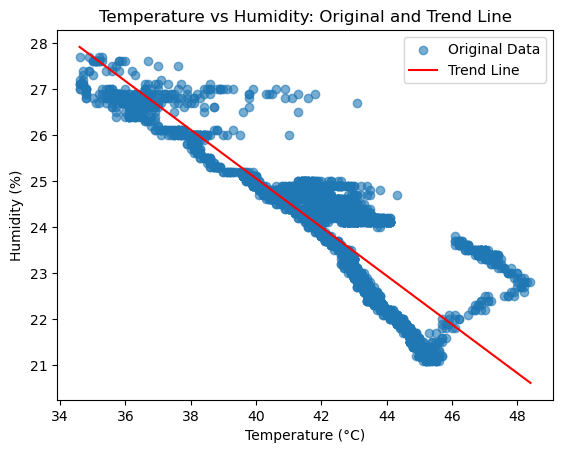

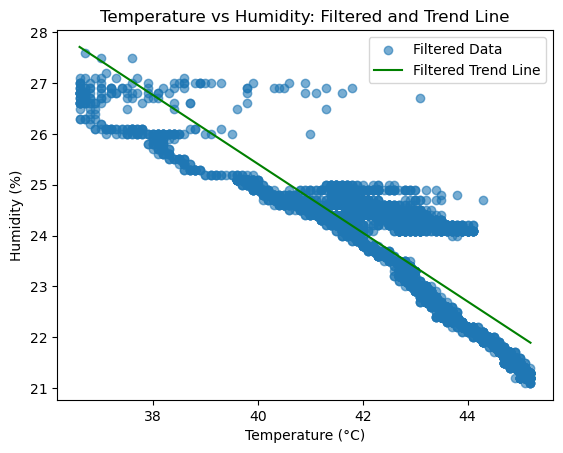

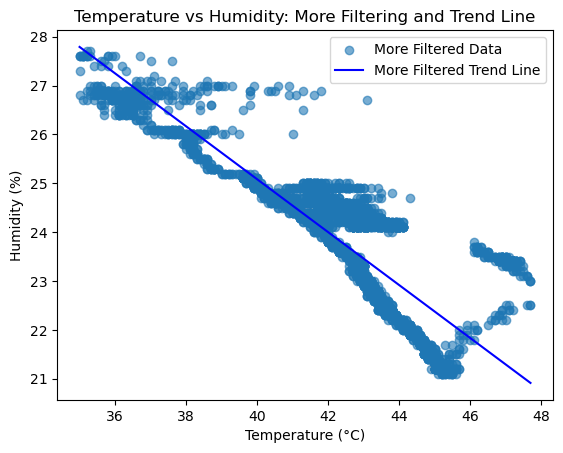

Initial slope: -0.5288256377218798
After 5-95% filter slope: -0.6769863456347116
After removing 10 extremes slope: -0.541603567158446


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('dht22_data.csv', header=None, names=['timestamp','temperature','humidity'])

X = df[['temperature']].values
y = df['humidity'].values

model = LinearRegression()
model.fit(X, y)

t_min, t_max = X.min(), X.max()
X_test = np.linspace(t_min, t_max, 100).reshape(-1,1)
y_pred = model.predict(X_test)

plt.scatter(X, y, label='Original Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Trend Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity: Original and Trend Line')
plt.legend()
plt.show()

from scipy.stats import zscore
zs = np.abs(zscore(df[['temperature','humidity']]))
outliers = df[(zs > 3).any(axis=1)]

low, high = df['temperature'].quantile([0.05, 0.95])
filtered_df = df[(df['temperature'] >= low) & (df['temperature'] <= high)]
X_f = filtered_df[['temperature']].values
y_f = filtered_df['humidity'].values

model_f = LinearRegression()
model_f.fit(X_f, y_f)
X_test_f = np.linspace(X_f.min(), X_f.max(), 100).reshape(-1,1)
y_pred_f = model_f.predict(X_test_f)

plt.scatter(X_f, y_f, label='Filtered Data', alpha=0.6)
plt.plot(X_test_f, y_pred_f, color='green', label='Filtered Trend Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity: Filtered and Trend Line')
plt.legend()
plt.show()

sorted_df = df.sort_values('temperature').iloc[25:-25]
X_ff = sorted_df[['temperature']].values
y_ff = sorted_df['humidity'].values

model_ff = LinearRegression()
model_ff.fit(X_ff, y_ff)
X_test_ff = np.linspace(X_ff.min(), X_ff.max(), 100).reshape(-1,1)
y_pred_ff = model_ff.predict(X_test_ff)

plt.scatter(X_ff, y_ff, label='More Filtered Data', alpha=0.6)
plt.plot(X_test_ff, y_pred_ff, color='blue', label='More Filtered Trend Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity: More Filtering and Trend Line')
plt.legend()
plt.show()

print("Initial slope:", model.coef_[0])
print("After 5-95% filter slope:", model_f.coef_[0])
print("After removing 10 extremes slope:", model_ff.coef_[0])
